In [1]:
#Use drawArbor(arbor) to return an plotly array
    #input: newtorx arbor
    #output: array for plotly
    
#Use FileDraw(file,G,alpha) to draw 3 graphs orignal, optimal then orignal and optimal supper imposed
    #input: 
        #file:string of file
        #G, alpha
    #output: 3 graphs:
        #oringal 
        #optimal given G and alpha
        #oringinal and optimal super imposed
        
#Use supperImpose(file,G,alpha) to just draw the orignal and optimal supperimposed on eachother
    #input: 
        #file:string of file
        #G, alpha
    #output:
        #oringal and optimal given G and alpha superimposed

In [2]:
#import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy
import plotly
from plotly import graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode
import networkx as nx
import os
%run 'NetworkxConverstion.ipynb'
# importing librarys

In [3]:
#to take a networkx arbor and return an array for plotly
#input:networx arbor
#output: array for plotly
def drawArbor(arbor):
    MainXs=[]
    MainYs=[]
    LateralXs=[]
    LateralYs=[]
    optX =[]
    optY=[]
    for node in arbor.nodes():
        x, y = arbor.nodes[node]['coordinate']
        if 'main root base' == arbor.nodes[node]['label']:
            baseX, baseY = x,y
        elif 'main root' == arbor.nodes[node]['label']:
            MainXs.append(x)
            MainYs.append(y)
        elif 'connection' == arbor.nodes[node]['label']:
            optX.append(x)
            optY.append(y)
        else:
            LateralXs.append(x)
            LateralYs.append(y)
    node_mainBase =go.Scatter(x =[baseX], y = [baseY], mode='markers', name= 'main root base')
    node_main= go.Scatter(x = MainXs, y = MainYs, mode = 'markers', name = 'main root points')
    node_lateral = go.Scatter(x = LateralXs, y =LateralYs, mode = 'markers', name = 'lateral root points')
    node_opt = go.Scatter(x=optX, y= optY, mode= 'markers', name = 'connections')
    MainXs=[]
    MainYs=[]
    LateralXs=[]
    LateralYs=[]
    for edge in arbor.edges():
        if 'main root' == arbor.edges[edge]['label']:
            x0, y0 = arbor.nodes[edge[0]]['coordinate']
            x1, y1 = arbor.nodes[edge[1]]['coordinate']
            MainXs.append(x0)
            MainXs.append(x1)
            MainXs.append(None)
            MainYs.append(y0)
            MainYs.append(y1)
            MainYs.append(None)
        elif 0 != arbor.edges[edge]['G']:
            xs = arbor.edges[edge]['xs']
            ys = arbor.edges[edge]['ys']
            for x in xs:
                LateralXs.append(x)
            LateralXs.append(None)
            for y in ys:
                LateralYs.append(y)
            LateralYs.append(None)
        else:
            x0, y0 = arbor.nodes[edge[0]]['coordinate']
            x1, y1 = arbor.nodes[edge[1]]['coordinate']
            LateralXs.append(x0)
            LateralXs.append(x1)
            LateralXs.append(None)
            LateralYs.append(y0)
            LateralYs.append(y1)
            LateralYs.append(None)
    edge_main = go.Scatter(x = MainXs, y =MainYs, mode = 'lines', name ='main root')
    edge_lateral = go.Scatter(x = LateralXs, y= LateralYs, mode='lines', name = 'lateral root')
    Array = [node_mainBase,node_main, node_opt, node_lateral,edge_main,edge_lateral]
    return Array
    # arbor is a networkx graph
    # draw the arbor in plotly

In [4]:
#draws 3 graphs orignal, optimal then orignal and optimal supper imposed
#input: 
    #file:string of file
    #G, alpha
#output: 3 graphs:
    #oringal 
    #optimal given G and alpha
    #oringinal and optimal super imposed
def FileDraw(file,G,alpha):
    Plant = readArborFile(file)
    fig=go.Figure()
    array = drawArbor(Plant)
    for x in array:
        fig.add_trace(x)
    print("original")
    fig.show()
    Plant2 = optimalArbor(Plant, G, alpha)
    fig2 = go.Figure(drawArbor(Plant2))
    array = drawArbor(Plant2)
    for x in array:
        fig.add_trace(x)
    print("optimal given: ", G, " ", alpha)
    fig2.show()
    print("optimal and original super imposed given: ",G, ", ", alpha )
    fig.show()

In [5]:
#draws the orignal and optimal supperimposed on eachother
#input: 
    #file:string of file
    #G, alpha
#output:
    #oringal and optimal given G and alpha superimposed
def supperImpose(file,G,alpha):
    Plant = readArborFile(file)
    fig=go.Figure()
    array = drawArbor(Plant)
    for x in array:
        fig.add_trace(x)
    Plant2 = optimalArbor(Plant, G, alpha)
    array = drawArbor(Plant2)
    for x in array:
        fig.add_trace(x)
    print("optimal and original super imposed given: G=",G, ", alpha=", alpha )
    fig.show()

optimal and original super imposed given: G= -2.4 , alpha= 0


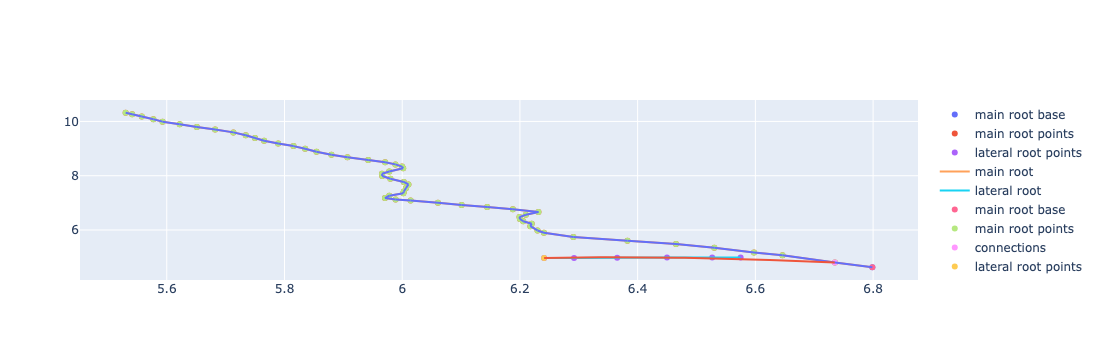

optimal and original super imposed given: G= -3 , alpha= 0.2


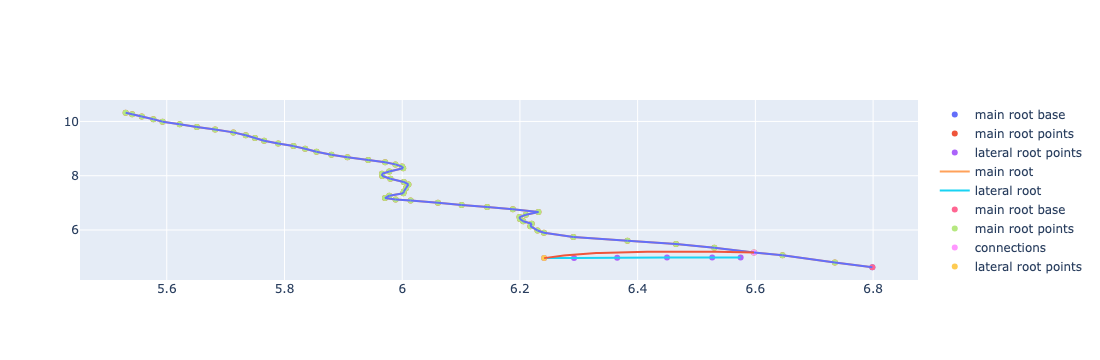

optimal and original super imposed given: G= -3 , alpha= 0


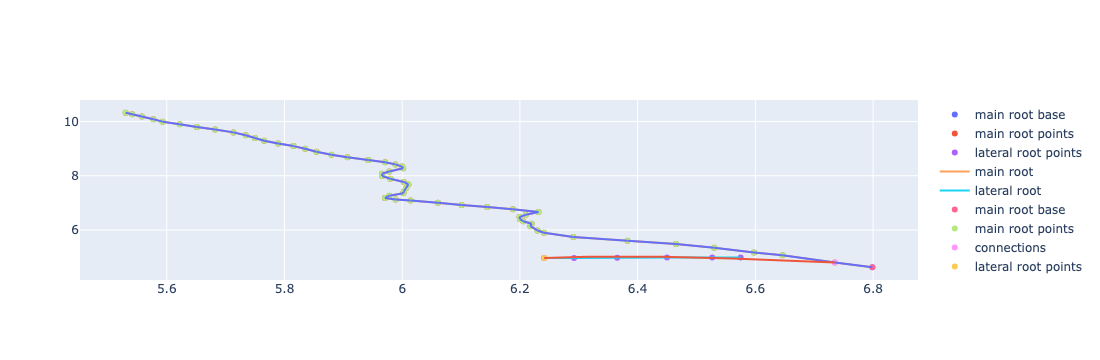

optimal and original super imposed given: G= 0 , alpha= 0.7


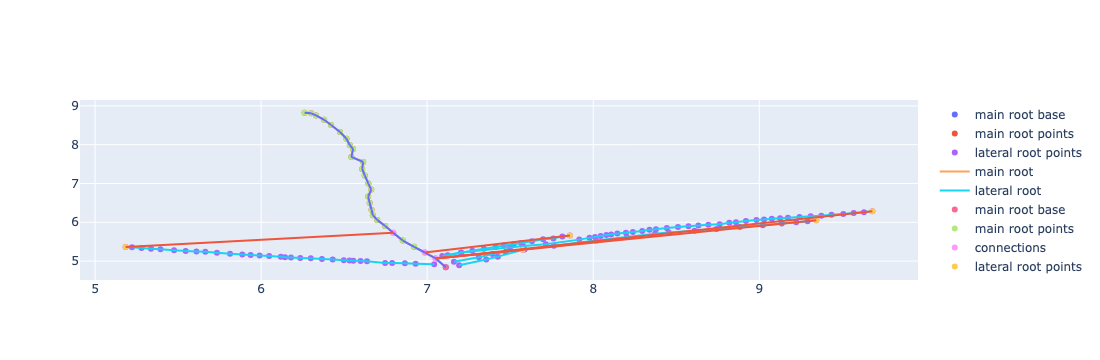

optimal and original super imposed given: G= 0.3 , alpha= 0


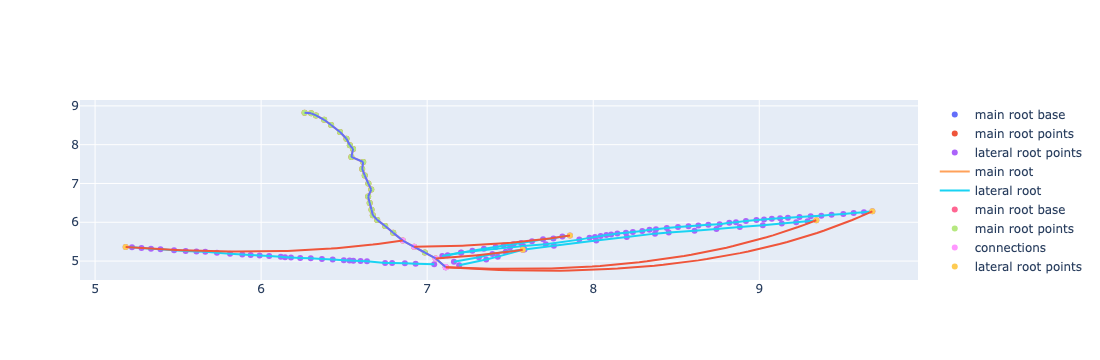

optimal and original super imposed given: G= 0.4 , alpha= 0


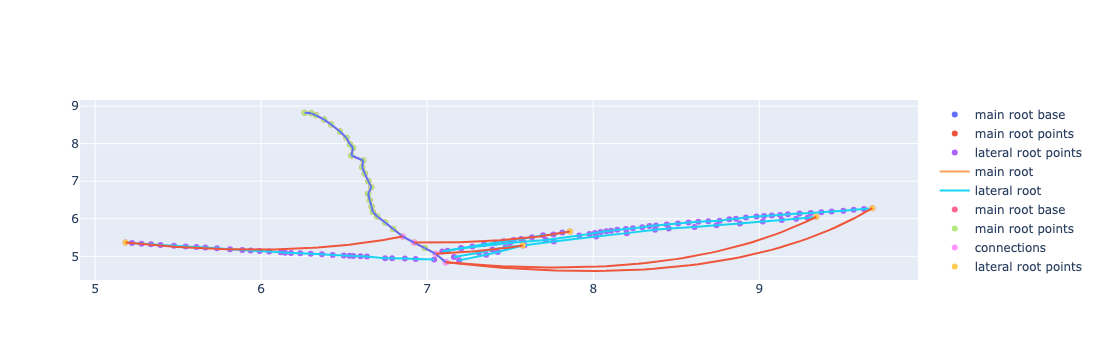

optimal and original super imposed given: G= -0.1 , alpha= 0.7


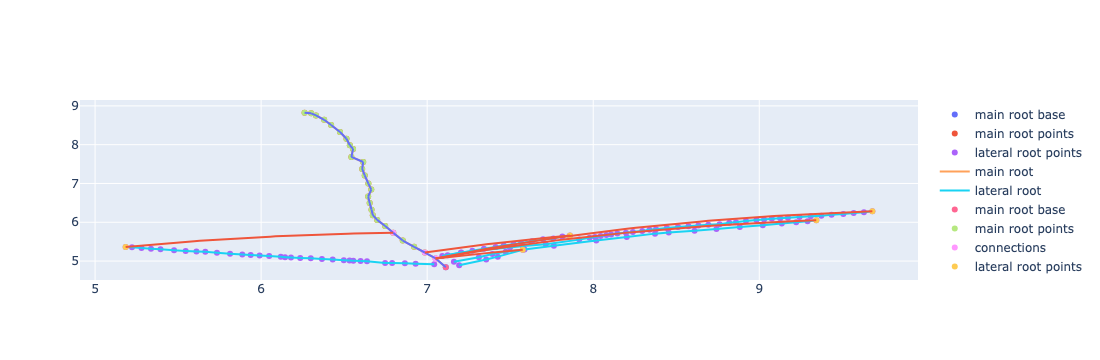